<a href="https://colab.research.google.com/github/Pavel-Pyvovar/ml_iasa_2020/blob/master/ml_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Хід виконання роботи:
1. [Представити початковi данi графiчно.](#1.-Представити-початковi-данi-графiчно)
2. [Побудувати модель кластеризацiї згiдно з варiантом](#2.-Побудувати-модель-кластеризацiї-згiдно-з-варiантом).
3. [Виконати кластеризацiю даних на основi моделi](#3.-Виконати-кластеризацiю-даних-на-основi-моделi).
4. [Представити розбиття на кластери графiчно, наприклад, рiзними кольорами](#4.-Представити-розбиття-на-кластери-графiчно,-наприклад,-рiзними-кольорами).
5. [Розрахувати додатковi результати кластеризацiї згiдно з варiантом.](#5.-Розрахувати-додатковi-результати-кластеризацiї-згiдно-з-варiантом.)
6. [Побудувати декiлька альтернативних моделей](#6.-Побудувати-декiлька-альтернативних-моделей)
7. [Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в класi metrics, згiдно з варiантом](#7.-Для-кожної-альтернативної-моделi-розрахувати-метрики-якостi-кластеризацiї,-що-реалiзованi-в-класi-metrics,-згiдно-з-варiантом)
8. [Виконати аналiз результатiв кластеризацiї одним з неформальних методiв згiдно з варiантом](#8.-Виконати-аналiз-результатiв-кластеризацiї-одним-з-неформальних-методiв-згiдно-з-варiантом)
9. [Зробити висновки про якiсть роботи моделей на дослiджених даних.](#9.-Зробити-висновки-про-якiсть-роботи-моделей-на-дослiджених-даних.)
10. [Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. Для кожного набору даних вибрати найкращу модель](#10.-Оцiнити-результати-кластеризацiї-на-основi-метрик-якостi-та-на-основi-неформальних-методiв.-Для-кожного-набору-даних-вибрати-найкращу-модель)
--- 


# Варіант 14
--- 



# 1. Представити початковi данi графiчно

In [0]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.datasets.samples_generator import make_blobs 
from tqdm import tqdm
import warnings

sns.set()
%matplotlib inline
np.set_printoptions(linewidth=100, suppress=True, precision=3)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore", category=FutureWarning)

## Iris data set

In [0]:
iris = load_dataset('iris')

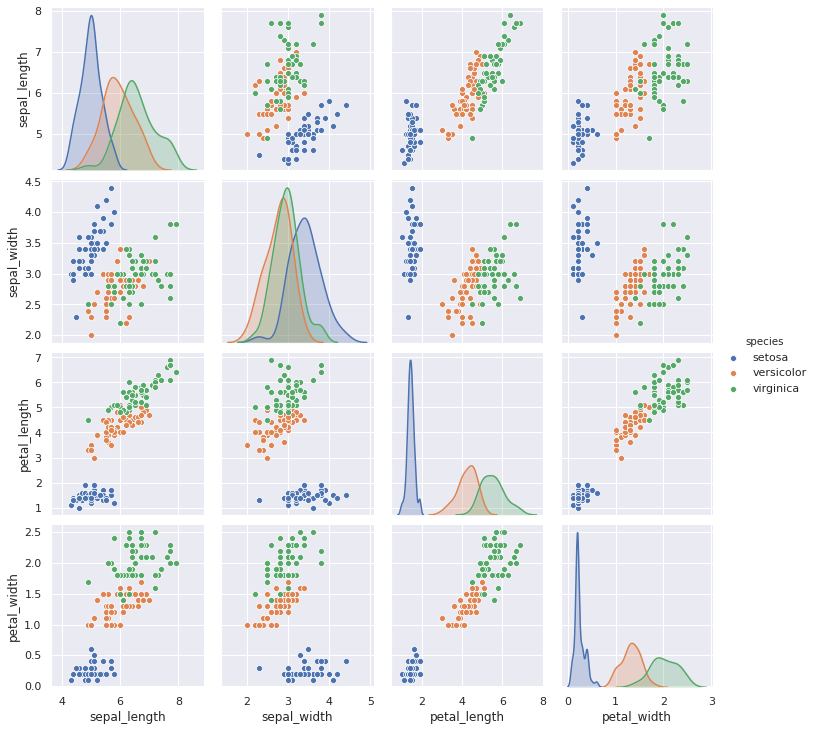

In [0]:
sns.pairplot(iris, hue='species')
plt.show()

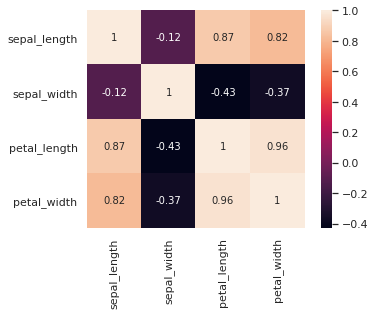

In [0]:
sns.heatmap(iris.corr(), annot=True, square=True)
plt.show()

In [0]:
iris.species = iris.species.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [0]:
iris_ground_truth = iris.species.copy(deep=True)

## Blob data set

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

y_true = y_true[:, np.newaxis]
blob = pd.DataFrame(np.append(X_stretched, y_true, axis=1), columns=['x1', 'x2', 'y'])
blob.y = blob.y.astype(int)
blob_ground_truth = blob.y.copy(deep=True)

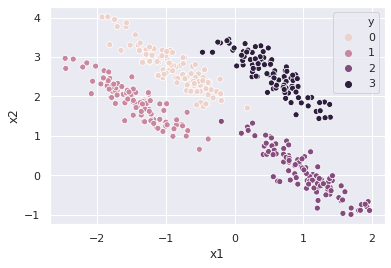

In [0]:
sns.scatterplot(x='x1', y='x2', data=blob, hue='y')
plt.show()

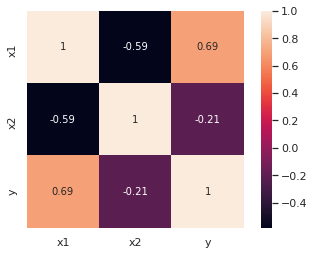

In [0]:
sns.heatmap(blob.corr(), annot=True, square=True)
plt.show()

# 2. Побудувати модель кластеризацiї згiдно з варiантом.

Агломеративний алгоритм AgglomerativeClustering.

In [0]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
agg_clus_iris = AgglomerativeClustering(n_clusters=n_clusters)
agg_clus_blob = AgglomerativeClustering(n_clusters=n_clusters)

# 3. Виконати кластеризацiю даних на основi моделi.

In [0]:
iris.species = agg_clus_iris.fit_predict(iris.drop('species', axis=1))
blob.y = agg_clus_blob.fit_predict(blob.drop('y', axis=1))

# 4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.

## Results on iris data set

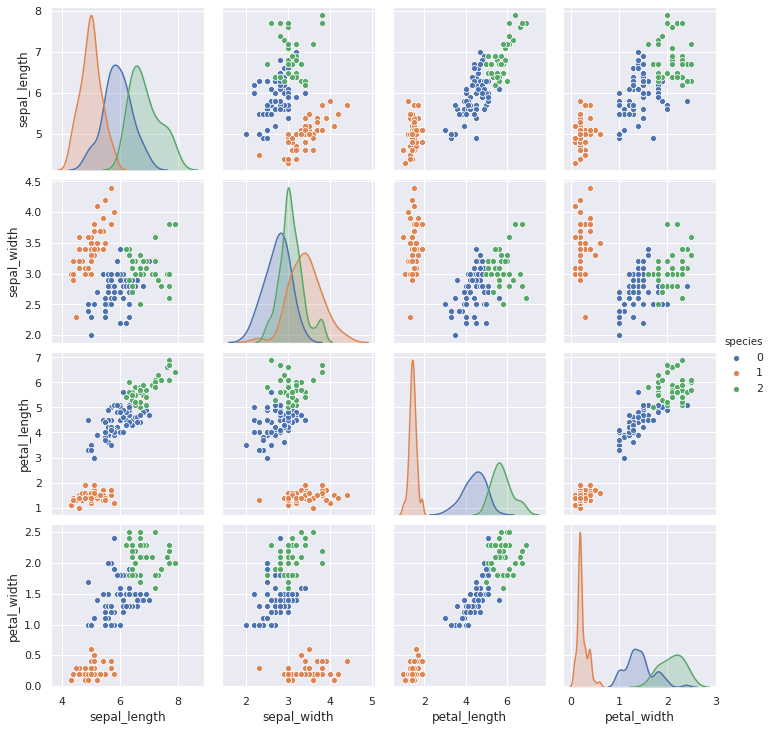

In [0]:
sns.pairplot(iris, hue='species')
plt.show()

## Results on blob data set

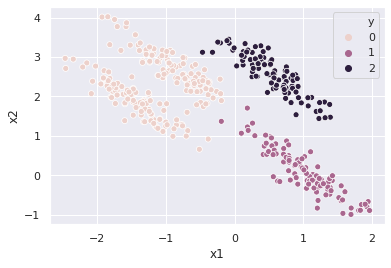

In [0]:
sns.scatterplot(x='x1', y='x2', data=blob, hue='y')
plt.show()

Зрозуміло, що кращим значенням параметру `n_clusters` для набору даних `blob` є 4.

# 5. Розрахувати додатковi результати кластеризацiї згiдно з варiантом.

Побудувати матрицi внутрiшньокласових вiдстаней, використовуючи `metrics.pairwise_distances`.

In [0]:
from sklearn.metrics import pairwise_distances

cluster_dist_matrices = {}
for i in range(n_clusters):
    for j in range(n_clusters):
        cluster_i = iris[iris.species == i].drop('species', axis=1)
        cluster_j = iris[iris.species == j].drop('species', axis=1)
        cluster_dist_matrices[f'{i}{j}'] = pairwise_distances(cluster_i, cluster_j)        

cluster_dist_matrices

{'00': array([[0.   , 0.539, 0.51 , ..., 0.583, 0.3  , 0.224],
        [0.539, 0.   , 0.3  , ..., 0.361, 0.812, 0.316],
        [0.51 , 0.3  , 0.   , ..., 0.141, 0.806, 0.332],
        ...,
        [0.583, 0.361, 0.141, ..., 0.   , 0.866, 0.412],
        [0.3  , 0.812, 0.806, ..., 0.866, 0.   , 0.51 ],
        [0.224, 0.316, 0.332, ..., 0.412, 0.51 , 0.   ]]),
 '01': array([[4.004, 3.617, 4.164, ..., 3.345, 2.09 , 3.058],
        [4.096, 3.686, 4.237, ..., 3.365, 1.913, 3.03 ],
        [4.277, 3.85 , 4.416, ..., 3.543, 2.086, 3.195],
        ...,
        [4.253, 3.813, 4.386, ..., 3.503, 2.027, 3.142],
        [3.85 , 3.486, 4.021, ..., 3.24 , 2.131, 2.99 ],
        [4.042, 3.643, 4.194, ..., 3.35 , 2.005, 3.04 ]]),
 '02': array([[5.285, 4.208, 5.302, ..., 4.46 , 4.651, 4.14 ],
        [5.339, 4.181, 5.357, ..., 4.499, 4.718, 4.153],
        [5.473, 4.335, 5.529, ..., 4.662, 4.849, 4.299],
        ...,
        [5.418, 4.274, 5.491, ..., 4.618, 4.797, 4.24 ],
        [5.167, 4.135, 5.16

# 6. Побудувати декiлька альтернативних моделей:

* шляхом змiни значень параметрiв основної моделi,
* використати рiзнi функцiї вiдстанi (`euclidean, l1, l2, manhattan, cosine, precomputed`)
* задати рiзнi значення кiлькостi кластерiв `n_clusters`

In [0]:
from sklearn.metrics import adjusted_rand_score, v_measure_score
from sklearn.model_selection import ParameterGrid

param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
    'linkage': ['ward', 'complete', 'average', 'single']
}

metrics = [adjusted_rand_score, v_measure_score]

def grid_search(param_grid, estimator, data, metrics, label_name='species',
                main_metric='adjusted_rand_score'):

    def prohibited_combo(params):
        prohibited = ['l1', 'l2', 'manhattan', 'cosine']
        return params.get('affinity') in prohibited and params.get('linkage') == 'ward'
        
    estimators, scores = [], []
     
    for params in tqdm(list(ParameterGrid(param_grid))):
        if not prohibited_combo(params):
            est = estimator(**params)
            estimated_labels = est.fit_predict(data)
            for metric in metrics:
                params[metric.__name__] = metric(data[label_name], estimated_labels) 
            scores.append(params)
            estimators.append(est)
    clustering_report = pd.DataFrame(scores, index=range(len(scores)))
    best_model = estimators[clustering_report[main_metric].idxmax()]
    return best_model, clustering_report

100%|██████████| 80/80 [00:00<00:00, 326.44it/s]


## Tunning models on iris data set

In [0]:
iris.species = iris_ground_truth

In [0]:
iris_best_model, iris_clustering_report = grid_search(param_grid, AgglomerativeClustering, iris, metrics)

100%|██████████| 80/80 [00:00<00:00, 329.41it/s]


In [0]:
iris.species = best_model.labels_

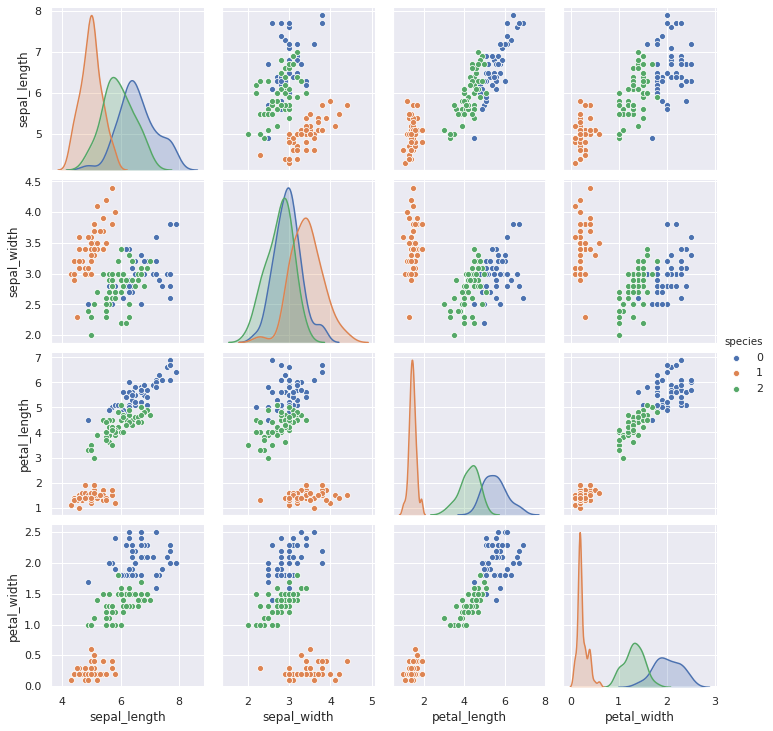

In [0]:
sns.pairplot(iris, hue='species')
plt.show()

## Tunning models on blob data set

In [0]:
blob.y = blob_ground_truth

In [0]:
blob_best_model, blob_clustering_report = grid_search(param_grid, AgglomerativeClustering, blob, metrics, label_name='y')

100%|██████████| 80/80 [00:00<00:00, 204.70it/s]


In [0]:
blob.y = blob_best_model.labels_

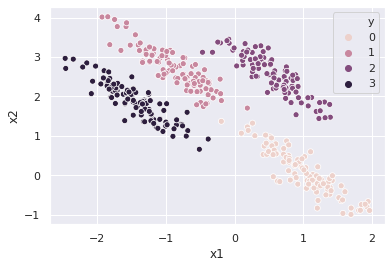

In [0]:
sns.scatterplot(x='x1', y='x2', data=blob, hue='y')
plt.show()

# 7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в класi metrics, згiдно з варiантом:

* **Estimated Number of Clusters.**
* **Adjusted Rand Index.**
* **V-measure.**

In [0]:
iris_clustering_report.sort_values('adjusted_rand_score')

,affinity,linkage,n_clusters,adjusted_rand_score,v_measure_score
61,cosine,single,3,0.558371,0.720118
25,l1,single,3,0.565747,0.723479
49,manhattan,single,3,0.565747,0.723479
0,euclidean,ward,2,0.568116,0.733680
20,l1,average,2,0.568116,0.733680
24,l1,single,2,0.568116,0.733680
16,l1,complete,2,0.568116,0.733680
28,l2,complete,2,0.568116,0.733680
44,manhattan,average,2,0.568116,0.733680
12,euclidean,single,2,0.568116,0.733680


In [0]:
blob_clustering_report.sort_values('adjusted_rand_score')

,affinity,linkage,n_clusters,adjusted_rand_score,v_measure_score
62,cosine,single,4,0.328704,0.570975
61,cosine,single,3,0.328707,0.573042
60,cosine,single,2,0.331658,0.577160
24,l1,single,2,0.331658,0.577160
48,manhattan,single,2,0.331658,0.577160
36,l2,single,2,0.331658,0.577160
12,euclidean,single,2,0.331658,0.577160
0,euclidean,ward,2,0.498113,0.666667
28,l2,complete,2,0.498113,0.666667
16,l1,complete,2,0.498113,0.666667


# 8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв згiдно з варiантом:

Чи є розбиття стабiльним пiсля видалення окремих об’єктiв?

In [0]:
iris_rectified = iris.sample(frac=.7)
iris_rectified_gt = iris_rectified.species.copy(deep=True)

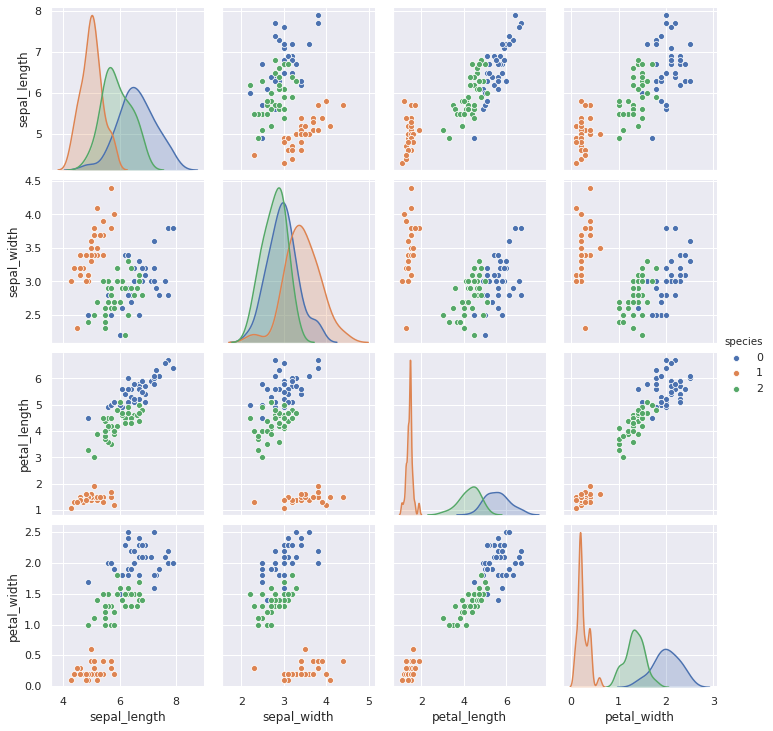

In [0]:
sns.pairplot(iris_rectified, hue='species')
plt.show()

In [0]:
test_agglo = AgglomerativeClustering(n_clusters=3)
iris_rectified.species = test_agglo.fit_predict(iris_rectified.drop('species', axis=1))

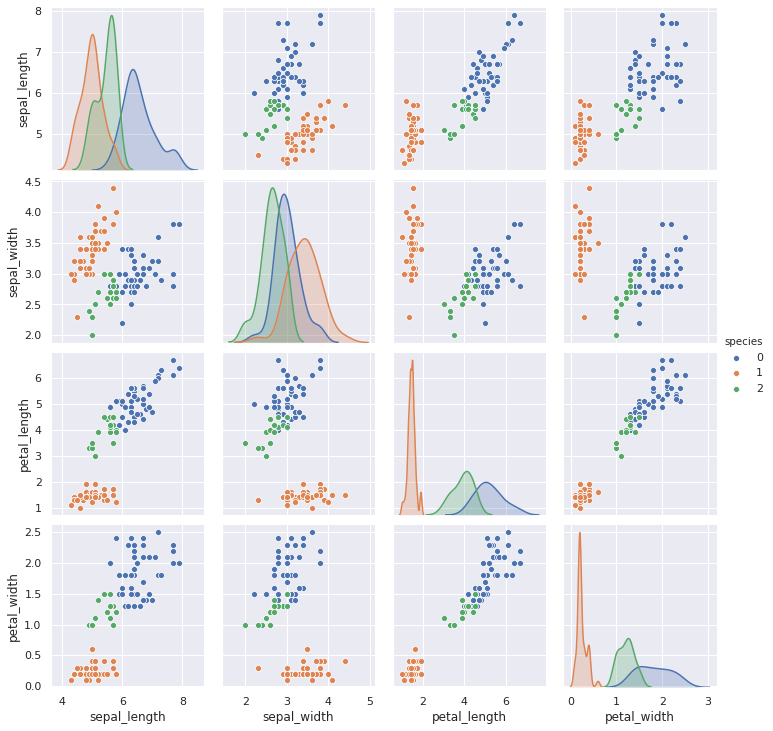

In [0]:
sns.pairplot(iris_rectified, hue='species')
plt.show()

In [0]:
adjusted_rand_score(iris_rectified_gt, iris_rectified.species)

0.7766719607723133

In [0]:
v_measure_score(iris_rectified_gt, iris_rectified.species)

0.8163784725125948

# 9. Зробити висновки про якiсть роботи моделей на дослiджених даних.

In [0]:
iris_clustering_report.sort_values('adjusted_rand_score').tail()

,affinity,linkage,n_clusters,adjusted_rand_score,v_measure_score
13,euclidean,single,3,1.0,1.0
37,l2,single,3,1.0,1.0
57,cosine,average,3,1.0,1.0
1,euclidean,ward,3,1.0,1.0
53,cosine,complete,3,1.0,1.0


Як видно із таблиці вище для набору даних `iris` найкращою кількістю кластерів в сенсі метрик `adjusted_rand_score` та `v_measure_score` є **три**, що співпадає зі справжньою кількістю классів. Крім того, видно що значення параметрів `affinity` та `linkage` є другорядним, найбільш сутт'євим параметром є `n_clusters`, ядже при різних значеннях попередніх двох та одному значенні останнього метрики мають однакове значення, 1.

In [0]:
blob_clustering_report.sort_values('adjusted_rand_score').tail()

,affinity,linkage,n_clusters,adjusted_rand_score,v_measure_score
38,l2,single,4,1.0,1.0
34,l2,average,4,1.0,1.0
14,euclidean,single,4,1.0,1.0
50,manhattan,single,4,1.0,1.0
22,l1,average,4,1.0,1.0


Як і у попередньому випадку, видно, що для набору blob параметр `n_clusters` є найважливішим і для моделей зі значенням цього параметра рівним чотирьом метрики мають максимальне значення. Найкраща в сенсі метрик кількість кластерів співпадає з кількістю класів у змінній `y_true` заданій на початку роботи.

# 10. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. Для кожного набору даних вибрати найкращу модель.

Для проведення аналізу роботи алгоритму **неформальним методом** було видалено тридцядь відсотків випадкових прикладів із набору даних `iris`. По-перше, із графіків зображених у пункті 8 видно деяке неспівпадіння справжніх класів із вивченими алгоритмом кластерів. Метрики `adjusted_rand_score` та `v_measure_score` підтверджують це спостереження, адже їх значення є меншим за одиницю. Отже,результати кластеризації дещо погіршились в результаті зменшення об'єму вибірки, проте загальні межі кластерів залишились приблизно однаковими, що свідчить про стійкість алгоритму до виділення окремих об'ктів.  

**Найкраща модель** для набору даних `iris`. Слід зазначити, що в результаті підбору параметрів було знайдено декілька моделей з однаково добрими показниками метрик. Серед найкращих було обрано одну без обґрунтованої на те причини. Тому напрямом для майбутнього покращення роботи може бути більш детальний аналіз моделей з найкращими параметрами, саме дослідження додаткових параметрів класу `AgglomerativeClustering`, таких як: `connectivity`, `compute_full_tree` та `distance_threshold`. 

In [0]:
iris_best_model.get_params()

{'affinity': 'euclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 3}

Найкраща модель для набору даних `blob`



In [0]:
blob_best_model.get_params()

{'affinity': 'euclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 4}

Найкращі моделі для одного і другого наборів даних були обрані за значенням метрики `adjusted_rand_score`